# 17 - Predictive Models 101

이 책의 1부에서는 인과 추론의 핵심 내용을 배웠습니다. 1부에서 소개한 개념은 잘 정의되었으며 오랫동안 검증되어온 것입니다. 앞으로 여정의 단단한 기반이 될 것입니다. 지금까지 인과 추론, 편향의 의미를 배웠습니다. 또한, 편향을 다루는 여러 방법(선형 회귀, `matching`, 성향 점수, 도구 변수, `Diff-in-Diff`, `RDD` 등)을 공부했습니다. 1부에서는 주로 평균 처치 효과 $E[Y_1 - Y_0]$를 구하기 위한 기초적인 기술에 초점을 맞췄습니다.
 
2부에서는 기계학습을 활용한 최근의 인과추론 연구 결과와 응용 방법을 배울 예정입니다. 이론적인 엄격함보다는 실용적으로 접근합니다. 일부 기술은 견고한 이론이 없지만 경험적으로 효과가 입증되었습니다. 근본적인 인과 관계를 연구하려는 과학자들보다는 실무에 인과 추론을 적용하고자 하는 사람에게 더 유용할 것입니다.
 
먼저 `heterogeneous treatment effects`(이종 처치 효과)의 개념에 관해 공부할 예정입니다. 평균 처치 효과인 $E[Y_1 - Y_0]$가 아닌 $X$를 조건으로 하는 처치 효과 $E[Y_1 - Y_0 | X]$를 구하고자 합니다. 요즘은 개인화가 중요한 세상입니다. 효과 있는 특정 그룹에 집중하고자 합니다. 이러한 상황에서 다음과 같은 질문에 답하고자 합니다. 우리는 누구를 신경 써야 할까요?

이 문제는 대부분 회사의 고민이기도 합니다. 누구에게 할인권을 줄까요? 대출 이자는 얼마가 적당할까요? 고객에게 어떤 물건을 보여줄까요? 사이트에 접속할 때 어떤 페이지를 띄워줘야 할까요? 이는 모두 이종 처치 효과에 관한 질문입니다. 더 깊이 들어가기 전에 앞으로 기본 도구가 될 기계학습이 산업에 미친 영향을 살펴봅시다.

## Machine Learning in the Industry
 
산업적으로 **기계학습**을 어떻게 쓰이고 있을까요? 17장은 기계학습에 익숙하지 않은 사람에게 좋은 단기 집중 과정이 될 것입니다. 기계학습을 처음 접하는 사람은 앞으로 배울 기술을 최대한 활용하기 위해 기초 내용을 숙지하는 것을 강력히 추천해 드립니다. 기계학습에 관해 잘 알고 있더라도 읽어주시기를 바랍니다. 끝까지 읽으면 분명 얻는 게 있을 거예요. 여기서는 일반적인 기계학습 설명 자료와는 달리 의사 결정 나무나 신경망 등 알고리즘을 자세히 설명하지는 **않을** 예정입니다. 대신 **실제 세계에서 기계학습을 어떻게 사용하는지** 알아보겠습니다.
 
![img](./data/img/industry-ml/ml-meme.png)
 
인과추론에서 기계학습이 중요한 이유는 무엇일까요? 인과관계는 기계학습의 예측과 대비됩니다. 기계학습과 비교함으로써 인과추론을 더 잘 이해할 수 있습니다. 또한, 최근의 인과추론은 기계학습 알고리즘을 활용하려는 시도가 많습니다. 이러한 내용을 이해하기 위해서는 기계학습을 잘 알고 있어야 합니다. 다만 기계학습은 마법의 기술처럼 과장된 면이 있어 실제로 기계학습의 작동 방법을 설명할 필요가 있습니다.

**기계학습은 빠르게 자동으로 예측을 수행하는 방법입니다.** 이 문장만으로도 기계학습의 90%는 설명할 수 있습니다. 컴퓨터 비전, 자율주행, 언어번역, 질병 진단과 같은 분야의 발전은 지도 기계학습의 발전에 따라 이루어졌습니다. 이러한 일들이 일이 예측으로 보이지 않을 수 있습니다. 어떻게 언어번역이 예측 문제인가요? 모든 문제를 예측 문제로 만드는 것은 기계학습의 특징입니다. 생각보다 많은 문제를 예측 문제로 바꿔 해결할 수 있습니다. 언어번역은 문장을 모델에 제시하고 다른 언어의 문장을 예측하는 것으로 해결할 수 있습니다. 여기서 예측은 **미래에 대한 예측이 아닙니다.** 대신 입력값으로부터 잘 정의된 출력값으로 대응(`mapping`)시키는 것을 의미합니다.
 
![img](./data/img/industry-ml/translation.png)
 
기계학습 모델이 하는 일은 매우 복잡한 `mapping` 함수를 학습하는 것입니다. 풀고자 하는 문제를 입력값과 출력값을 대응시키는 문제로 바꿀 수 있다면 기계학습은 좋은 접근입니다. 자율주행 또한 출력값이 여럿인 예측 문제로 생각할 수 있습니다. 바퀴 각도, 브레이크 압력, 가속기 압력을 예측하는 문제를 해결함으로써 자율주행 자동차를 구현할 수 있습니다.

수학적으로 기계학습은 다음과 같은 기댓값을 추정합니다.
 
$
E[Y|X]
$
 
$Y$는 우리가 알고 싶은 것(번역된 문장, 질병 진단 결과)이며, $X$는 이미 알고 있는 것(입력 문장, X선 사진)입니다. 기계학습은 단순히 조건부 기대 함수를 추정합니다.

좋습니다. 처음 생각보다 기계학습의 예측은 훨씬 강력해 보입니다. 자율주행 자동차나 언어번역 문제를 해결하는 것은 꽤 멋진 일이지만, 구글이나 우버에서 일하지 않는 한 여러분의 일과는 거리가 있을 겁니다. 좀 더 일반적인 예시로 고객을 확보하는 문제를 생각해보겠습니다.
 
고객을 확보하기 전에는 어떤 고객이 수익을 가져다주는지 파악해야 합니다. 고객을 확보하기 위해서는 비용(광고비, 배송비 등)이 필요하며 확보된 고객은 여러분 회사에 수익을 가져다줍니다. 인터넷 사업자나 가스 공급 회사를 생각하면 이해하기가 쉽습니다. 일반적으로 고객 별 현금 흐름은 다음과 같습니다.
 
![img](./data/img/industry-ml/cashflow-1.png)
 
그림에서 막대기는 비용이나 수익과 같은 금전적인 사건을 의미합니다. 고객을 확보하기 위해 광고비를 투자(빨간색)해야 합니다. 고객을 확보하고 나서도 온보딩(제품 사용 설명)이나 설치 비용이 발생할 수 있습니다. 모든 투자가 끝난 후에야 수익이 발생하기 시작합니다. 특정 시점에서는 유지보수 비용이 발생할 수 있습니다. 최종적으로 고객과의 계약이 종료되면 수익과 비용을 결산합니다.
 
어떤 고객이 수익을 가져다주는지 알기 위해서 막대기를 계단식으로 정렬할 수 있습니다. 비용과 수익의 합계가 $0$보다 클수록 수익이 많습니다.

![img](./data/img/industry-ml/cascade-1.png)
 
반대로 비용이 더 클 수도 있습니다. 유지보수 비용이 크다면 계단식 그래프에서 결과가 $0$ 아래로 떨어질 수 있습니다.
 
![img](./data/img/industry-ml/cascade-2.png)
 
실제 현금 흐름은 사업에 따라 더 복잡할 수 있습니다. 이자율이나 할인에 관한 내용을 추가할 수도 있지만 설명에 필요한 내용은 이것으로 충분합니다.

우리는 무엇을 할 수 있을까요? 고객 데이터를 많이 가지고 있다면 수익에 따라 고객을 구분하기 위한 기계학습 모델을 훈련할 수 있습니다. 학습된 모델의 예측값으로 수익이 많이 나는 고객에 집중할 수 있습니다. 또한, 고객이 큰 비용을 발생시키기 전 계약을 해지할 수도 있습니다. 우리는 **문제를 예측 문제로 만들어 기계학습으로 풀고자 합니다.** 즉, 수익이 나는 고객을 식별하여 이들과 거래하고 싶습니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use("ggplot")

여기 $10,000$명의 고객에 관한 30일간 거래 데이터가 있습니다. `cacq`는 고객별로 발생하는 비용을 의미합니다. 배송비나 제품 교육비가 이에 해당합니다. 여기서는 고객을 완벽하게 통제할 수 있다고 가정합니다. 당신은 특정 고객과 거래하거나 거절할 수 있습니다. 사전에 수익을 낼 수 있는 고객을 파악하고 그들하고만 거래하려 합니다.

In [2]:
transactions = pd.read_csv("data/customer_transactions.csv")
print(transactions.shape)
transactions.head()

(10000, 32)


,customer_id,cacq,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,...,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29
0,0,-110,6,0,73,10,0,0,0,21,...,0,0,0,0,0,0,0,0,0,0
1,1,-58,0,0,0,15,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-7,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,-30,0,3,2,0,9,0,0,0,...,0,0,40,0,0,0,0,0,0,0
4,4,-42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


기계학습은 거래 데이터로부터 좋은 고객과 나쁜 고객을 구분하는 규칙을 학습할 것입니다. 문제를 단순히 하기 위해 모든 거래 데이터와 `cacq`를 더하겠습니다. 이 방법은 거래 내역을 감춘다는 사실에 유의하세요.
 
합계는 `net_value`로 표기합니다. 우리의 목표는 고객과 계약을 결정하기 **전** 수익이 발생할 고객을 파악하는 것이므로 미리 알 수 있는 데이터만 `feature`로 사용합니다. `feature`에 해당하는 변수는 지역(`region`), 소득(`income`), 나이(`age`)로 별도의 `csv`파일에서 가져옵니다.

In [3]:
profitable = (transactions[["customer_id"]]
              .assign(net_value = transactions
                      .drop(columns="customer_id")
                      .sum(axis=1)))

customer_features = (pd.read_csv("data/customer_features.csv")
                     .merge(profitable, on="customer_id"))

customer_features.head()

,customer_id,region,income,age,net_value
0,0,30,1025,24,130
1,1,41,1649,26,10
2,2,18,2034,33,-6
3,3,20,1859,35,136
4,4,1,1243,26,-8


좋습니다! 조금씩 문제를 정리하고 있습니다. 기계학습 모델로 돈이 되는 고객 (`net_value > 0`)을 파악하고자 합니다. 여러 방법을 시도해보고 효과적인 방법을 알아봅시다. 하지만 그 전에 기계학습이 작동하는 방법을 간단히 살펴봅시다. 이미 기계학습이 어떻게 작동하는지 알고 있다면 건너뛰어도 무방합니다.
 
## Machine Learning Crash Course
 
기계학습이 작동하기 위해서는 정답지(`label`)가 필요합니다. 수집한 데이터를 기계학습 모델로 훈련하면 새로운 데이터를 입력으로 받아 예측값을 얻을 수 있습니다. 아래 그림은 전체적인 흐름을 나타냅니다.
 
![img](./data/img/industry-ml/ml-flow.png)
 
예시에서 `label`은 `net_value`입니다. `feature`(`region`, `income`, `age`)로 `net_value`를 예측하는 기계학습 모델을 훈련하면 새로운 데이터로 `net_value`를 예측할 수 있습니다. 예측은 그림의 왼쪽 부분에 해당합니다. 새로운 데이터는 `feature`(`region`, `income`, `age`)만 알고 있지만 기계학습 모델을 사용해 `net_value`를 예측할 수 있습니다.

기계학습은 조건부 기댓값 $E[Y|X]$을 추정합니다. $Y$는 `target variable` 이나 `outcome`, $X$는 `feature`라 불립니다. 기계학습은 단지 $\hat{E}[Y|X]$를 얻을 방법의 하나일 뿐입니다. 일반적으로는 오차나 손실 함수를 최적화하는 방법으로 학습할 수 있습니다.
 
기계학습은 어떠한 함수라도 근사할 수 있어 까다롭습니다. 항상 훈련 데이터를 완벽하게 맞출 수 있을 정도로 모델을 강력하게 만들 수 있습니다. 대부분 기계학습 모델은 복잡성을 조절하는 하이퍼 파라미터가 있으며 모델의 복잡도를 조정할 수 있습니다. 아래 그림은 단순한 모델(왼쪽), 중간 모델(가운데) 및 복잡한 모델(오른쪽)을 보여줍니다. 복잡한 모델은 훈련 데이터를 완벽하게 맞추고 있습니다.

![img](./data/img/industry-ml/model-fit.png)
 
모델을 배포하기 전에 미리 평가할 방법이 있을까요? 단순하게 예측값과 실제값을 비교해 볼 수 있습니다. $R^2$와 같은 지표를 사용하면 비교 결과를 수치로 확인할 수 있습니다. 복잡한 모델은 데이터를 완벽하게 맞추고 있으므로 예측값은 실제값과 완벽히 일치합니다. 이 방법은 모델을 복잡하게 만들수록 결과가 좋아진다는 점에서 문제가 있습니다.

매우 복잡한 모델은 일반적으로 **좋지 않습니다**. 여러분은 어떤 모델을 선호하시나요? 복잡한 모델이요? 아마도 가운데 모델을 선택할 것입니다. 데이터에 완벽하게 맞지는 않지만, 여전히 좋은 예측을 할 수 있기 때문입니다.
 
![img](./data/img/industry-ml/overfitting.jpg)
 
모델을 너무 복잡하게 만들면 데이터의 패턴뿐 아니라 무작위 잡음도 함께 학습합니다. 학습된 잡음은 실제 잡음과 다르므로 결국 "완벽한" 모델은 틀리게 됩니다. 전문용어로는 모델이 과적합 되어 있어 일반화가 어렵다고 합니다. 어떻게 하면 좋을까요?

아이디어는 정답을 알고 있는 데이터를 두 개로 나누는 것입니다. 하나는 모델 훈련에 사용하고, 다른 하나는 모델 검증에 사용합니다. 두 번째 데이터는 훈련 중 접근할 수 없는 것처럼 생각합니다. 이 방법은 교차검증이라 부릅니다. 

![img](./data/img/industry-ml/test.png)
 
위 그림은 검증 결과 보여줍니다. 복잡한 모델은 잘 맞지 않습니다. 오히려 가운데 모델이 더 좋아 보입니다. 교차검증은 매우 중요한 내용이므로 더 살펴보겠습니다.

## Cross Validation
 
교차검증은 모델 선택에 유용한 방법입니다. 거의 필수적으로 채용하고 있습니다. 교차검증의 기본 아이디어는 실제 세계를 모방하는 것입니다. 이미 정답을 알고 있지만 모델이 보지 않은 데이터(`unseen data`)를 예측해 봅니다. `unseen data`는 앞으로 마주할 새로운 데이터를 대신합니다.
 
고객 확보 문제에 교차검증을 적용해보겠습니다. 아래는 순서에 따라 진행합니다.

1. 훈련 데이터와 검증 데이터를 나눕니다. 훈련 데이터는 이미 정답을 알고 있으므로 기계학습 모델을 학습할 수 있습니다. 
2. 훈련 데이터로 임의의 고객으로부터 얻을 수익을 예측하는 규칙을 **학습**합니다.
3. **학습에 사용하지 않은** 데이터에 규칙을 적용해 봅니다. 즉, 훈련 데이터로 학습된 모델을 검증 데이터에 적용합니다. 
 
아래 그림은 분할된 데이터를 나타냅니다. 그림의 가장 오른쪽에는 정말로 볼 수 없는 데이터(`Unseen Data`)가 있으며 내부 데이터(`Internal Data`) 안에서 보이지 않는 것 가정하는 검증 데이터(`Test Data`)를 얻습니다.

![img](./data/img/industry-ml/cross-validation.png)
 
쉽게 말하자면 내부 데이터로 훈련 데이터와 테스트 데이터로 나눕니다. 훈련 데이터로 수익을 예측하는 규칙을 학습하고, 테스트 데이터로 검증합니다. 테스트 데이터는 학습하지 않습니다.

교차검증 방법으로 `k-fold cross-validation`, `temporal cross validation` 등 더 복잡한 방법이 있지만 지금은 단순하게 둘로 나누는 정도면 충분합니다. 교차검증의 기본 아이디어는 배포 환경에서 어떤 일이 생길지 시뮬레이션하여 현실적인 추정치를 얻는 것입니다.

데이터를 둘로 나눠 보겠습니다. $70$%는 모델 학습에 사용하며 나머지 $30$%는 테스트에 사용합니다.

In [4]:
train, test = train_test_split(customer_features, test_size=0.3, random_state=13)
train.shape, test.shape

((7000, 5), (3000, 5))

## Predictions and Policies
 
![img](./data/img/industry-ml/profit.png)
 
두 가지 개념을 상세히 살펴보겠습니다. **prediction**(예측)은 무언가 추정하거나 예측하는 숫자로 $\hat{E}[y_i|X_i]$와 같습니다. 앞의 예시에서는 예측된 수익이며, 예측 결과는 `16BRL`와 같이 단순한 숫자로 표현됩니다.
 
두 번째 개념은 **policy**(정책)입니다. 정책은 결정을 자동화하는 규칙을 뜻합니다. 예를 들면 예상 수익이 $1,000$ 이상인 고객과만 계약하는 규칙을 만들 수 있습니다. 일반적으로 예측을 기반으로 정책을 만듭니다. 수익이 $10$ 이하인 고객을 계약에서 제외하고자 한다면 정책은 $\hat{E}[y_i|X_i] > 10$가 됩니다. 기계학습으로는 첫 번째 개념인 예측을 잘 다룰 수 있습니다. 하지만 예측만으로는 할 수 있는 것은 없습니다. 예측 결과를 기반으로 정책을 만들어 결정해야 합니다.

예측과 정책 모두 교차검증을 적용해야 합니다. 즉, 하나의 데이터 세트로 예측 모델과 정책을 만들고 다른 데이터 세트로 확인해야 합니다.
 
## One Feature Policies
 
기계학습으로 넘어가기 전에 간단한 것들을 시도해 보겠습니다. $20$%만 노력해도 $80$%의 성과를 낼 수 있지만 종종 대부분의 데이터 과학자는 이 사실을 잊습니다. 우리가 할 수 있는 가장 간단한 일은 무엇일까요? **모든 고객과 계약합니다!** 누가 수익을 가져다주는지 파악하는 대신 모든 고객과 계약하고 총수입이 많기를 기대하는 것입니다.
 
모든 고객과 계약하는 것이 좋은 생각인지 평균 순수익을 확인해 봅시다. 순수익이 양수라면 평균적으로 수익을 낸다는 의미입니다. 고객별로 수익이 날 수도 손해 볼 수도 있지만, 고객을 충분히 많이 확보한다면 결국 돈을 벌 수 있을 것입니다. 반면에 순수익이 음수면 모든 고객과 계약할 때 손해 보게 됩니다.

In [5]:
train["net_value"].mean()

-29.169428571428572

실망스럽게도 모든 고객과 계약하면 평균적으로 $30$헤알만큼 손해 봅니다. 아주 단순한 정책은 효과가 없습니다. 수익을 내려면 더 좋은 방법을 찾아야 합니다. 참고로 이 예시는 교육적인 목적이 큽니다. 단순한 정책인 "모든 사람을 똑같이 대한다."는 효과가 없었지만, 실제로는 효과가 좋을 때가 더 많습니다. 일반적으로 모든 사람에게 광고 메일을 보내는 것이 좋으며, 모든 사람에게 할인 쿠폰을 배포하는 것도 좋습니다.
 
그다음으로 간단한 방법은 무엇일까요? 고객의 `feature`로 좋은 고객과 나쁜 고객을 구별해 봅시다. 고객의 소득을 예로 들면 직관적으로 부유한 고객이 더 많은 수익을 낼 것으로 생각할 수 있습니다. 부유한 고객과만 계약한다면 어떨까요? 좋은 생각인지 확인해 봅시다.
 
분석을 위해 데이터를 소득 분위수로 나눕니다. 분위수는 데이터를 동일한 크기로 나눌 수 있어 개인적으로 선호하는 방법입니다. 그리고 각각의 소득 분위수의 평균 순이익을 계산해 보겠습니다. 기댓값은 음의 평균 순이익 $E[NetValue]<0$이지만, 순이익이 양수인 $E[NetValue|Income=x]<0$ (아마도 더 높은 소득 그룹) 일부 하위 모집단이 있을 수 있습니다.

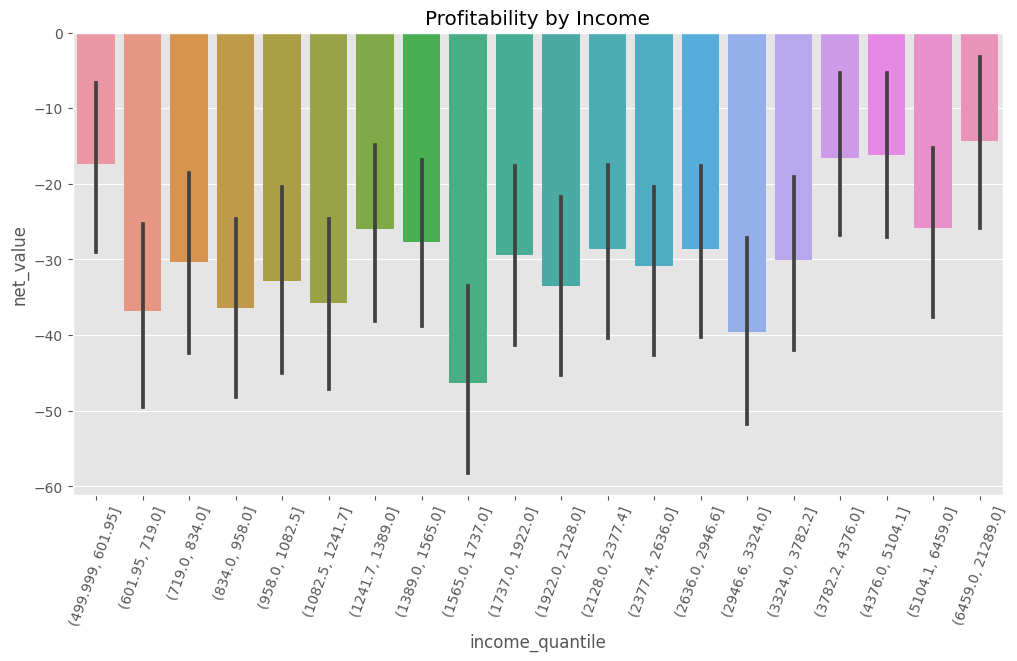

In [6]:
plt.figure(figsize=(12,6))
np.random.seed(123) ## seed because the CIs from seaborn uses boostrap

# pd.qcut create quantiles of a column
sns.barplot(data=train.assign(income_quantile=pd.qcut(train["income"], q=20)), 
            x="income_quantile", y="net_value")
plt.title("Profitability by Income")
plt.xticks(rotation=70);

이 방법도 정답이 아니네요. 모든 소득 분위수에서 평균 순이익이 음수입니다. 대체로 부유한 고객은 손해액이 적긴 하지만, 전체적으로 손해입니다. 지역과 같은 다른 변수는 어떨까요? 예를 들어 비용 대부분이 먼 곳의 고객에게 물건을 배송하는 배송비라면 지역은 수익성을 결정하는 `feature`가 될 것입니다.

지역은 이미 범주형 변수이므로 분위수를 사용하지 않아도 됩니다. 지역별 평균 순이익을 살펴보겠습니다.

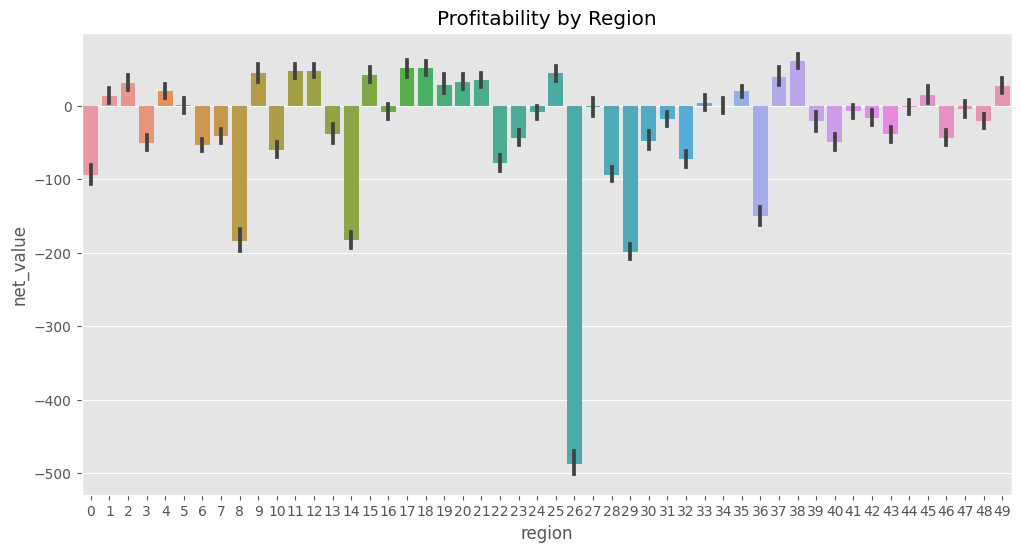

In [7]:
plt.figure(figsize=(12,6))
np.random.seed(123)
region_plot = sns.barplot(data=train, x="region", y="net_value")
plt.title("Profitability by Region");

빙고! $2$, $17$, $39$와 같이 수익이 나는 지역과 $0$, $9$, $29$와 같이 손해가 나는 지역을 확인할 수 있습니다. 매우 좋아 보이네요! 이제 정책을 만들 수 있습니다. **데이터에 따라** 수익이 나는 지역의 고객과만 계약합니다.

지금 간단한 기계학습을 하고 있음에 주목하세요. 각 지역의 기대 순이익 $E[NetValue|Region]$을 추정하고 있습니다. 이제 추정치로 무엇인가 해봅시다.

정책을 만들기 위해 지역별 예상 순수익의 $95$% 신뢰구간을 구할 것입니다. 신뢰구간이 $0$보다 크면 보다 크면 해당 지역의 고객과 계약합니다.

아래 코드는 `key`가 지역(`region`)이고 `value`가 $95$% CI 하한인 `dictionary`를 만듭니다. `dictionary` 생성기는 예상 순수익이 양수인 지역만 골라냅니다. 결과는 정책에 따라 계약할 지역이 됩니다.

In [8]:
# extract the lower bound of the 95% CI from the plot above
regions_to_net = train.groupby('region')['net_value'].agg(['mean', 'count', 'std'])

regions_to_net = regions_to_net.assign(
    lower_bound=regions_to_net['mean'] - 1.96*regions_to_net['std']/(regions_to_net['count']**0.5)
)

regions_to_net_lower_bound = regions_to_net['lower_bound'].to_dict()
regions_to_net = regions_to_net['mean'].to_dict()

# filters regions where the net value lower bound is > 0.
regions_to_invest = {region: net 
                     for region, net in regions_to_net_lower_bound.items()
                     if net > 0}

regions_to_invest

{1: 2.9729729729729737,
 2: 20.543302704837856,
 4: 10.051075065003388,
 9: 32.08862469914759,
 11: 37.434210420891255,
 12: 37.44213667009523,
 15: 32.09847683044394,
 17: 39.52753893574483,
 18: 41.86162250217046,
 19: 15.62406327716401,
 20: 22.06654814414531,
 21: 24.621030401718578,
 25: 33.97022928360584,
 35: 11.68776141117673,
 37: 27.83183541449011,
 38: 49.740709395699994,
 45: 2.286387928016998,
 49: 17.01853709535029}

`regions_to_invest`는 주목해야 할 모든 지역을 포함합니다. 이제 테스트 데이터에서 정책이 잘 작동하는지 확인해 봅시다. 정책을 평가하는 중요한 단계입니다. 우연히 훈련 데이터에 포함된 지역이 수익성이 좋아 보일 수 있기 때문입니다. 무작위성에 의해 테스트 데이터에서 훈련 데이터와 같은 패턴을 찾을 가능성은 거의 없습니다.
 
훈련 데이터에서 수익이 높았던 지역의 고객만 포함하도록 테스트 데이터를 필터링합니다. 그리고 순이익 분포와 정책의 평균 순이익도 표시해 봅시다.

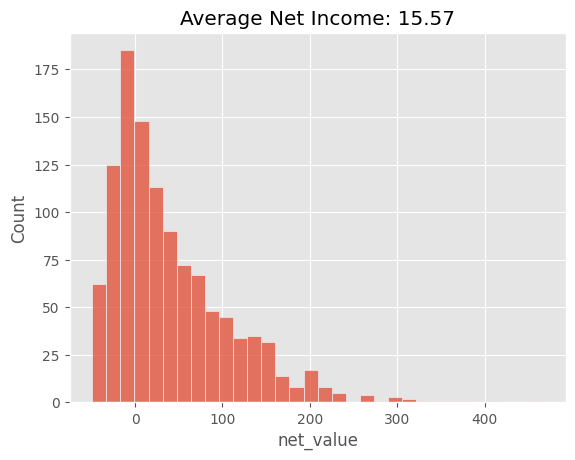

In [9]:
region_policy = (test[test["region"]
                      # filter regions in regions_to_invest
                      .isin(regions_to_invest.keys())]) 

sns.histplot(data=region_policy, x="net_value")
# average has to be over all customers, not just the one we've filtered with the policy
plt.title("Average Net Income: %.2f" % (region_policy["net_value"].sum() / test.shape[0]));

## Machine Learning Models as Policy Inputs
 
더 잘하고 싶다면 기계학습을 사용할 수 있습니다. 기계학습은 복잡성을 가져다주지만, 미미한 개선에 그치는 경우가 대부분입니다. 하지만 상황에 따라 돈을 벌 기회를 가져다주기도 하며 이는 오늘날 기계학습이 가치 있는 이유기도 합니다.

여기서는 `Gradient Boosting model`을 사용합니다. 꽤 복잡한 알고리즘이지만 간단히 사용할 수 있습니다. 우리의 목적은 $E[Y|X]$를 추정하는 것이므로 알고리즘 작동 방법을 세세하게 알 필요는 없습니다. 기계학습 모델에서 복잡성을 조절할 수 있다는 사실을 기억하시나요? 복잡할수록 모델은 강력해집니다. 하지만 너무 복잡한 모델은 과적합을 유발하며 테스트 데이터에 일반화할 수 없습니다. 따라서 모델의 복잡성을 검증하기 위해 교차검증을 해야 합니다.

단순한 지역 정책을 개선하기 위한 방법을 고민해봅시다. 큰 개선은 두 가지입니다. 먼저 번거롭게 `feature`를 찾을 필요가 없습니다. 좋은 고객과 나쁜 고객을 구별할 수 있는 `feature`를 찾는 과정은 꽤 번거롭습니다. 예제는 `feature`가 $3$개로 적어 직접 찾는 것이 가능했지만 $100$개 라면 어려울 것입니다. 물론 [다중 비교](https://en.wikipedia.org/wiki/Multiple_comparisons_problem)와 거짓 양성 비율에도 주의해야 합니다. 둘째로 두 개 이상의 `feature`를 고려할 수 있게 됩니다. 데이터는 지역 외에도 고객 소득 데이터를 포함합니다. 고객의 소득만으로는 많은 것을 알 수 없었지만, 지역과 함께 고려하면 어떨까요? 해당 지역의 부유한 고객에게 집중한다면 더 많은 수익을 낼 수도 있습니다. 즉, $E[NetValue|Region, Income, Age]$가 $E[NetValue|Region]$보다 `NetValue` 예측에 더 나은 추정값이 될 수 있습니다. 많은 정보를 사용하면 순수익을 더 잘 예측할 수 있습니다.

두 개 이상 `feature`를 사용한 복잡한 정책을 만들기는 매우 어려우며, `feature`의 개수에 따라 조합이 기하급수적으로 커져 실용적이지 않습니다. 대신 기계학습을 사용하면 모델에 모든 `feature`를 넣어 상호작용을 학습할 수 있습니다. 

모델의 목표는 `region`, `income`, `age`로 `net_value`를 예측하는 것입니다. 범주형 변수인 `region`은 숫자로 바꿔야 하는데, 훈련 데이터 내 각 지역 평균 순이익으로 대체합니다. `regions_to_net`에 값이 저장된 걸 기억하시나요? `replace` 함수를 사용해 값을 인자로 넘겨주면 `region` 값을 바꿀 수 있습니다. 이 기능은 여러 번 사용되므로 함수로 만들겠습니다. 학습이 잘되도록 `feature`를 바꾸는 과정을 `feature engineering`이라 부릅니다.

In [10]:
def encode(df): 
    return df.replace({"region": regions_to_net})

다음은 [Sklearn](https://scikit-learn.org/stable/)에서 모델을 가져옵니다. `sklearn`의 모델의 사용법은 꽤 표준화되어 있습니다. 먼저 복잡도를 지정해 모델을 만듭니다. 여기서는 `n_estimators`는 $400$, `max_depth`는 $4$로 설정합니다. `max_depth`가 깊어지고 `n_estimators`가 많아질수록 모델 성능이 좋아집니다. 물론 과적합을 고려해 너무 과하게 설정하면 안 됩니다. 다시 말하지만, 설정에 대한 자세한 내용은 알 필요가 없습니다. 매우 좋은 예측 모델이라는 점만 기억하세요. 모델을 훈련하기 위해 `feature` `X`와 `target` `net_value`로 `.fit()`을 호출합니다.

In [11]:
model_params = {'n_estimators': 400,
                'max_depth': 4,
                'min_samples_split': 10,
                'learning_rate': 0.01,
                'loss': 'squared_error'}

features = ["region", "income", "age"]
target = "net_value"

np.random.seed(123)

reg = ensemble.GradientBoostingRegressor(**model_params)

# fit model on the training set
encoded_train = train[features].pipe(encode)
reg.fit(encoded_train, train[target]);

모델 훈련이 끝났습니다. 다음으로는 **테스트** 데이터로 모델의 예측 성능을 검증합니다. 기계학습을 평가하기 위해 수많은 지표가 있습니다. 여기서는 $R^2$를 사용합니다. 이것도 자세히 알 필요는 없습니다. 연속 변수(순이익)를 예측하는 모델 평가에 유용하다는 것만 알아도 충분합니다. $R^2$는 $-\inf$에서 $1.0$의 범위를 가집니다. 예측이 평균보다 나쁜 경우 음수입니다. $R^2$는 순이익 분산이 얼마나 모델로 설명되고 있는지 숫자로 보여줍니다.

In [12]:
train_pred = (encoded_train
              .assign(predictions=reg.predict(encoded_train[features])))

print("Train R2: ", r2_score(y_true=train[target], y_pred=train_pred["predictions"]))
print("Test R2: ", r2_score(y_true=test[target], y_pred=reg.predict(test[features].pipe(encode))))

Train R2:  0.7108790300152951
Test R2:  0.6938513063048141


모델은 훈련 데이터 순수익 분산의 약 71%를 설명하고, 테스트 데이터 순이익 분산의 약 69%를 설명합니다. 모델은 훈련 데이터만 보기 때문에 훈련 데이터에서 성능이 좋은 경향이 있습니다. 과적합을 확인해 보려면 `max_depth`를 $14$로 설정해보세요. 훈련 데이터의 $R^2$는 올라가지만 테스트 데이터의 $R^2$는 낮아집니다.

정책을 만들기 위해 테스트 세트의 예측값을 `prediction`에 저장합니다. 예측값은 $E[NetValue|Age, Income, Region]$ 추정치입니다.

In [13]:
model_policy = test.assign(prediction=reg.predict(test[features].pipe(encode)))

model_policy.head()

,customer_id,region,income,age,net_value,prediction
5952,5952,19,1983,23,21,47.734883
1783,1783,31,914,31,-46,-36.026935
4811,4811,33,1349,25,-19,22.553420
145,145,20,1840,26,55,48.306256
7146,7146,19,3032,34,-17,7.039414


앞에서 했던 것처럼 모델 예측값으로 평균 순이익을 구해보겠습니다. 예측값이 연속형이므로 범주형 데이터로 만들어야 합니다. 한 가지 방법은 `pandas`의 `pd.qcut`을 사용하는 것입니다. 이 함수는 데이터를 분위수로 나눕니다. 분위수로 지역 개수인 $50$을 사용해봅시다. 저는 분위수를 **모델 밴드**라 부릅니다. 개별 그룹에 대해 모델 예측 범위를 알려주기 때문입니다.

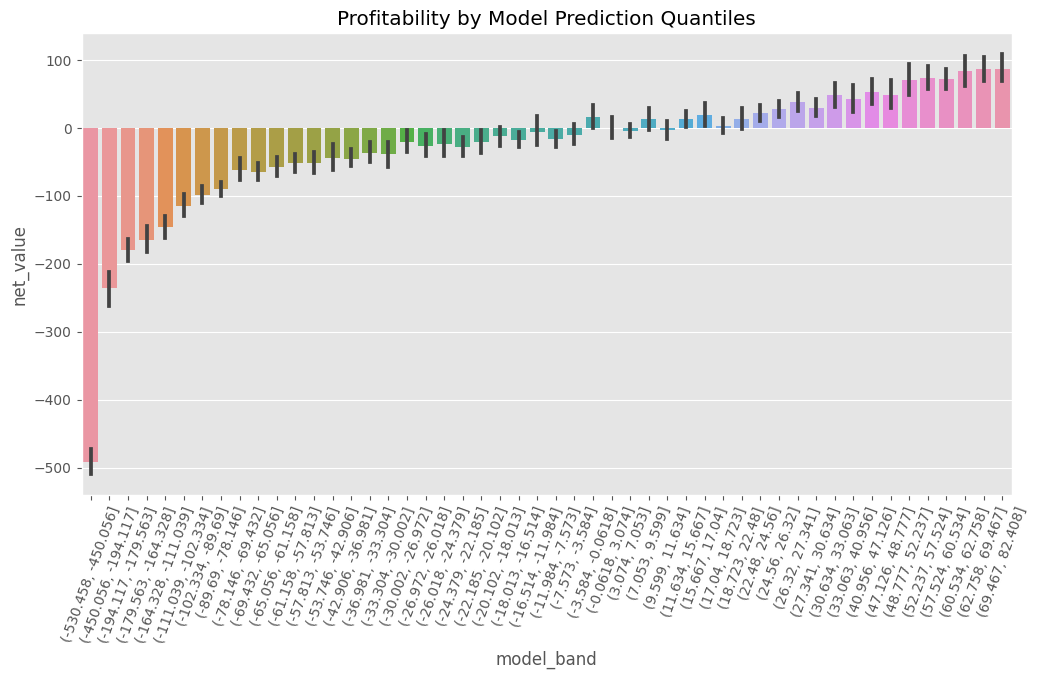

In [14]:
plt.figure(figsize=(12,6))

n_bands = 50
bands = [f"band_{b}" for b in range(1,n_bands+1)]

np.random.seed(123)
model_plot = sns.barplot(data=model_policy
                         .assign(model_band = pd.qcut(model_policy["prediction"], q=n_bands)),
                         x="model_band", y="net_value")
plt.title("Profitability by Model Prediction Quantiles")
plt.xticks(rotation=70);

순이익이 음수인 밴드와 양수인 밴드가 있으며, 잘 구별되지 않는 밴드도 존재합니다. 또한, 모델 밴드 왼쪽에서 오른쪽으로 가면서 상승 추세를 보이고 있네요.

기계학습 모델로 만든 정책과 지역 데이터만 사용하는 정책을 비교하기 위해 테스트 데이터에 대해 순이익 히스토그램을 그려봅시다.

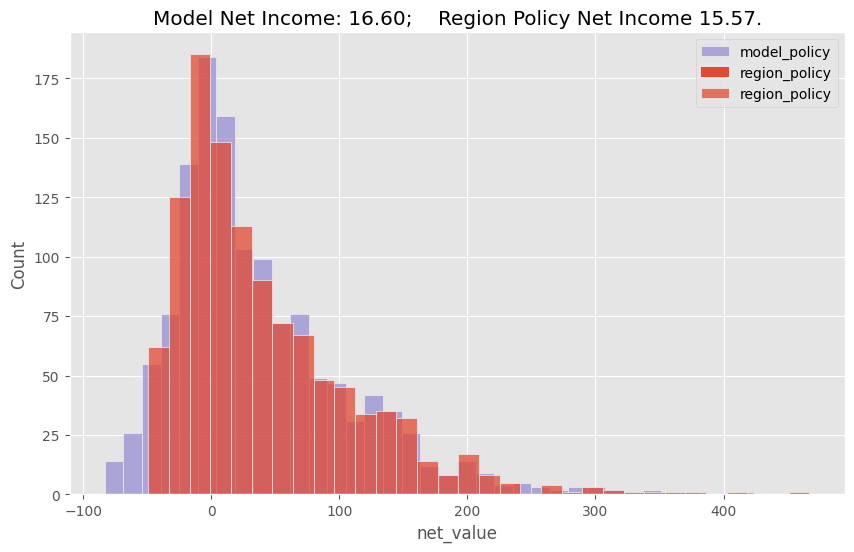

In [15]:
plt.figure(figsize=(10,6))
model_plot_df = (model_policy[model_policy["prediction"]>0])
sns.histplot(data=model_plot_df, x="net_value", color="C2", label="model_policy")

region_plot_df = (model_policy[model_policy["region"].isin(regions_to_invest.keys())])
sns.histplot(data=region_plot_df, x="net_value", label="region_policy")

plt.title("Model Net Income: %.2f;    Region Policy Net Income %.2f." % 
          (model_plot_df["net_value"].sum() / test.shape[0],
           region_plot_df["net_value"].sum() / test.shape[0]))
plt.legend();

기계학습 모델은 지역만 사용하는 단순한 정책보다 더 나은 정책을 만들어 주지만 그 효과는 미미합니다. 기계학습 정책은 고객당 $16.6$헤알, 지역 정책은 고객당 $15.5$헤알 이익을 가져다줍니다. 고객이 많아질수록 기계학습 정책으로 얻을 수 있는 총수입은 증가할 것입니다.
 
## Fine Grain Policy
 
앞에서 가장 단순한 정책(모든 고객을 대상)을 테스트했습니다. 이 정책은 한계 순이익을 추정하는 것으로 볼 수 있습니다. 평균적으로는 손해이므로 효과가 없어 지역을 기반으로 하는 단일 `feature`를 사용하는 정책을 만들었습니다. 정책은 $\hat{E}[NetValue|Region] > 0$인 일부 지역에서만 사업을 하는 것으로 결과가 좋았습니다. 다음으로는 모든 `feature`를 사용해 예측 모델을 학습했습니다. 그리고 학습된 모델의 예측값이 $0$이상인 고객과만 계약하는 정책을 만들었습니다.

정책이 하는 일은 매우 간단합니다. 고객과 계약하거나 하지 않는 것입니다. 지금까지 다룬 정책은 이진 분류에 해당합니다. 
 
결정의 기준이 되는 값을 **thresholding**(임계값)이라 합니다. 예측 결과가 임계값보다 큰지 작은지에 따라 다른 결정을 내리게 됩니다. 사기 탐지 모델에도 적용할 수 있습니다. 사기 탐지 모델의 예측 점수가 임계값 `X`보다 크다면 거래 승인을 반려합니다.

임계값은 실제로 많은 곳에서 사용되고 있으며 이진 분류에 특히 유용합니다. 이제 상황이 더 복잡한 경우를 생각해봅시다. 예를 들어 매우 수익성이 높은 고객의 관심을 끌기 위해 광고비를 더 지출하거나 특별 대우를 해준다고 해봅시다. 이때 의사 결정은 이진 분류보다는 연속적이어야 합니다. 고객에게 얼마나 큰 비용을 투자해야 할까요?
 
투자 비용을 결정하는 문제를 풀어봅시다. 특정 고객을 대상으로 다른 회사와 경쟁하고 있으며, 투자 비용이 많으면 고객과 계약이 성사된다고 가정합니다. 수익성에 따라 투자 비용을 다르게 하는 것이 합리적입니다. 예를 들어 수익성이 높은 고객에 많이 투자해야 하며 수익성이 낮은 고객에는 투자하면 안 됩니다.

예측값을 밴드로 구분해 문제를 해결할 수 있습니다. 분위수나 크기로 구분된 밴드를 20개 만들겠습니다. 첫 번째 밴드는 하위 5% 고객을 포함합니다. *예측에 따르면* 두 번째 밴드는 하위 5% ~ 10% 고객을 포함합니다. 마지막 밴드는 가장 수익성이 높은 고객을 포함할 것입니다.
 
구간화 역시 훈련 데이터에서 추정하고 테스트 데이터에 적용해야 합니다. 따라서 훈련 데이터에서 `pd.qcut`을 적용해 구간을 나눕니다. 구간을 나누기 위해 훈련 데이터에서 미리 계산된 결과를 전달하는 `np.digitize`를 사용합니다.

In [16]:
def model_binner(prediction_column, bins):
    # find the bins according to the training set
    bands = pd.qcut(prediction_column, q=bins, retbins=True)[1]
    
    def binner_function(prediction_column):
        return np.digitize(prediction_column, bands)
    
    return binner_function
    

# train the binning function
binner_fn = model_binner(train_pred["predictions"], 20)

# apply the binning
model_band = model_policy.assign(bands = binner_fn(model_policy["prediction"]))
model_band.head()

,customer_id,region,income,age,net_value,prediction,bands
5952,5952,19,1983,23,21,47.734883,18
1783,1783,31,914,31,-46,-36.026935,7
4811,4811,33,1349,25,-19,22.553420,15
145,145,20,1840,26,55,48.306256,18
7146,7146,19,3032,34,-17,7.039414,13


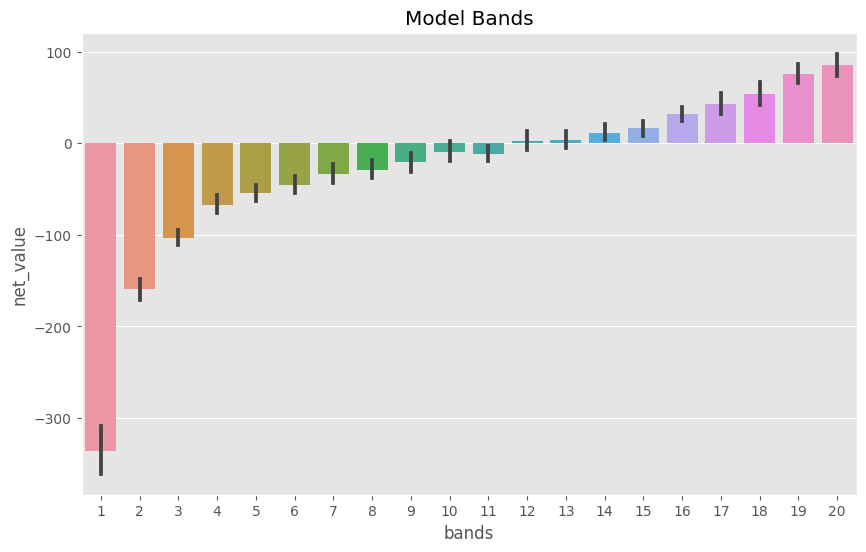

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=model_band, x="bands", y="net_value")
plt.title("Model Bands");

$20$, $19$에 해당하는 고객에 많이 투자해야 합니다. 물론 더 많은 밴드를 만들어 미세하게 조정할 수 있습니다. 구간화를 하지 않을 수도 있는데, 모델의 예측값을 그대로 사용하되 아래와 같은 규칙을 만듭니다.

```
mkt_investments_i = model_prediction_i * 0.3
```

수식에 따라 각 고객 $i$에 대해 모델이 예측한 `net_value`의 30%의 투자합니다.

## Key Ideas
 
17장에서는 짧은 시간에 많은 것을 배웠습니다. 기계학습은 입력값을 출력값으로 매핑하는 규칙을 배움으로써 좋은 예측을 할 수 있습니다. 기계학습에서 예측은 기댓값 $E[Y|X]$을 추정하는 것과 같습니다. 또한, 예측을 통해 언어번역과 자율주행 같은 문제를 어떻게 풀 수 있는지 배웠습니다.
 
고객을 유치하는 구체적인 예시를 통해 기계학습이 어떻게 도움이 되는지 살펴보았습니다. 어떤 고객과 거래할지 결정하는 정책을 만들기도 했습니다.

**비즈니스 문제를 예측 문제로 만들 수 있다면 기계학습은 적합한 도구입니다.** 저는 이 점을 강조하고 싶습니다. 기계학습에 대한 맹신으로 사람들은 중요한 것을 잊고 쓸모없는 것을 예측하는 데 시간을 낭비하곤 합니다. 사람들은 종종 비즈니스 문제를 해결하기 위해 기계학습을 도입하기보다 예측 모델을 먼저 만들고 나서야 예측 결과로 할 수 있는 비즈니스를 찾곤 합니다. 이 방법이 효과 있을 수도 있지만, 대부분 더 큰 문제를 만듭니다.
 
## References 
 
The things I've written here are mostly stuff from my head. I've learned them through experience. This means there isn't a direct reference I can point you to. It also means that the things I wrote here have **not** passed the academic scrutiny that good science often goes through. Instead, notice how I'm talking about things that work in practice, but I don't spend too much time explaining why that is the case. It's a sort of science from the streets, if you will. However, I am putting this up for public scrutiny, so, by all means, if you find something preposterous, open an issue and I'll address it to the best of my efforts. 
 
Finally, I believe I might have been too quick for those who were hoping for a comprehensive and detailed introduction of machine learning. To be honest, I believe that where I can truly generate value is teaching about causal inference, not machine learning. For the latter, there are tons of amazing online resources, much better than I could ever dream of creating. The classical one is [Andrew Ng's course on Machine Learning](https://www.coursera.org/learn/machine-learning) and I definitely recommend you take a look into it if you are new to machine learning.
 
## Contribute
 
Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. It uses only free software, based in Python. Its goal is to be accessible monetarily and intellectually.
If you found this book valuable and you want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits or giving feedback on passages you didn't understand. Just go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it useful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).